In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import os

import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv("/content/heart.csv")

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
df.shape

(303, 14)

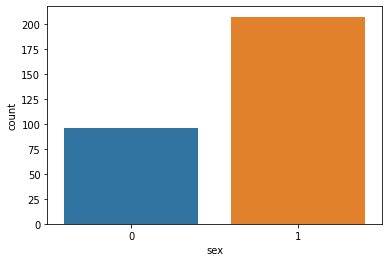

In [25]:
sns.countplot(x='sex',data=df)

([<matplotlib.patches.Wedge at 0x7f093541ce90>,
 [Text(-0.14686074568008553, -1.1909793958663977, 'Male'),
  Text(0.13462245242198823, 1.0917311002732724, 'Female')],
 [Text(-0.08566876831338321, -0.6947379809220652, '68.3%'),
  Text(0.07343042859381176, 0.5954896910581484, '31.7%')])

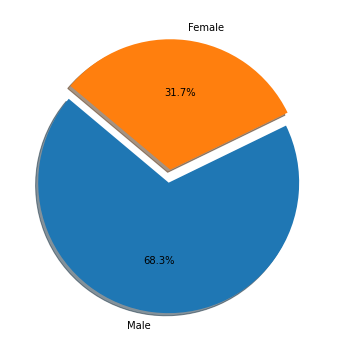

In [26]:
plt.figure(figsize=(8,6))
explode =[0.1,0]
labels='Male','Female'
plt.pie(df['sex'].value_counts(),explode=explode,autopct='%1.1f%%',labels=labels,shadow=True,startangle=140)

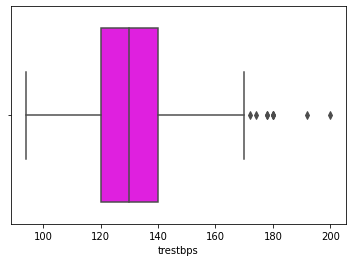

In [27]:
sns.boxplot(df['trestbps'],orient='h',color='fuchsia')

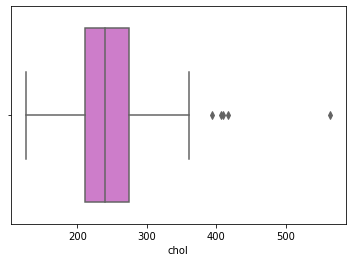

In [28]:
sns.boxplot(df['chol'],orient='v',color='orchid')

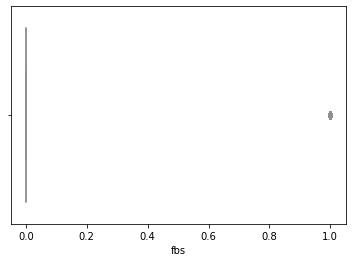

In [29]:
sns.boxplot(df['fbs'],orient='v',color='lavender')

([<matplotlib.patches.Wedge at 0x7f09352e1b50>,
 [Text(-0.8492609737945328, -0.8477946675873598, 'Pain-Type 0'),
  Text(1.0995795764416507, 0.030409785799970036, 'Pain Type-1'),
  Text(0.13462224799150097, 1.0917311254817803, 'Pain-Type2'),
  Text(-0.6517811933299695, 0.8861045514053978, 'Pain-Type3')],
 [Text(-0.49540223471347744, -0.49454688942595987, '47.2%'),
  Text(0.5997706780590821, 0.016587155890892744, '28.7%'),
  Text(0.07343031708627325, 0.5954897048082438, '16.5%'),
  Text(-0.35551701454361967, 0.4833297553120351, '7.6%')])

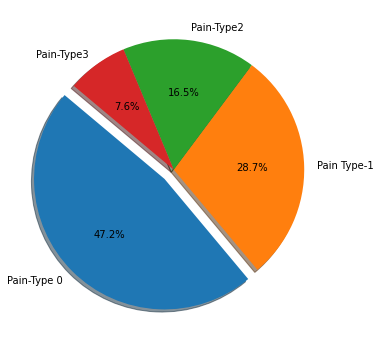

In [30]:
plt.figure(figsize=(10,6))
explode=[0.1,0,0,0]
labels='Pain-Type 0','Pain Type-1','Pain-Type2','Pain-Type3'
plt.pie(df['cp'].value_counts(),explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=140)

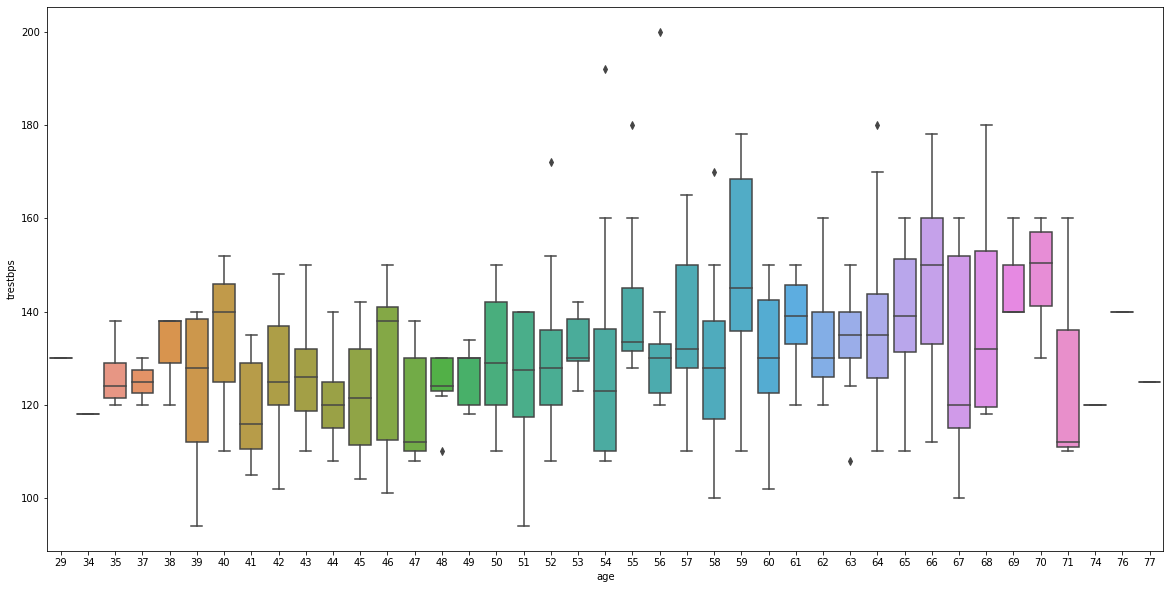

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(x='age',y='trestbps',data=df)


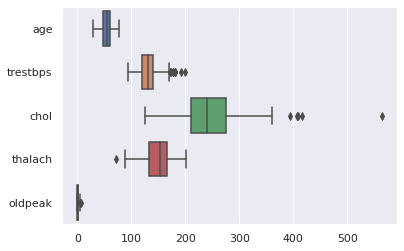

In [70]:
df = dataset
for col in dataset.columns:
    if df[col].unique().size < 6:                # 5 is the maximum for 'value_couts' categorical features 
        df = df.drop(columns = [col])
sns.boxplot(data = df, orient = 'h')

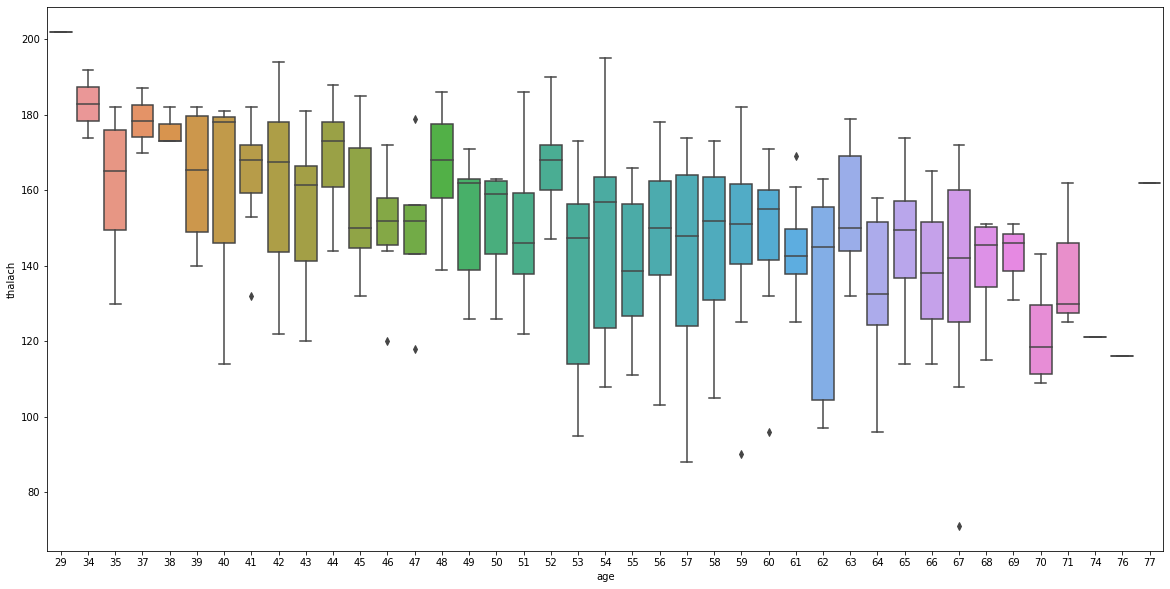

In [35]:
plt.figure(figsize=(20,10))
sns.boxplot(x='age',y='thalach',data=df)


<function matplotlib.pyplot.show(*args, **kw)>

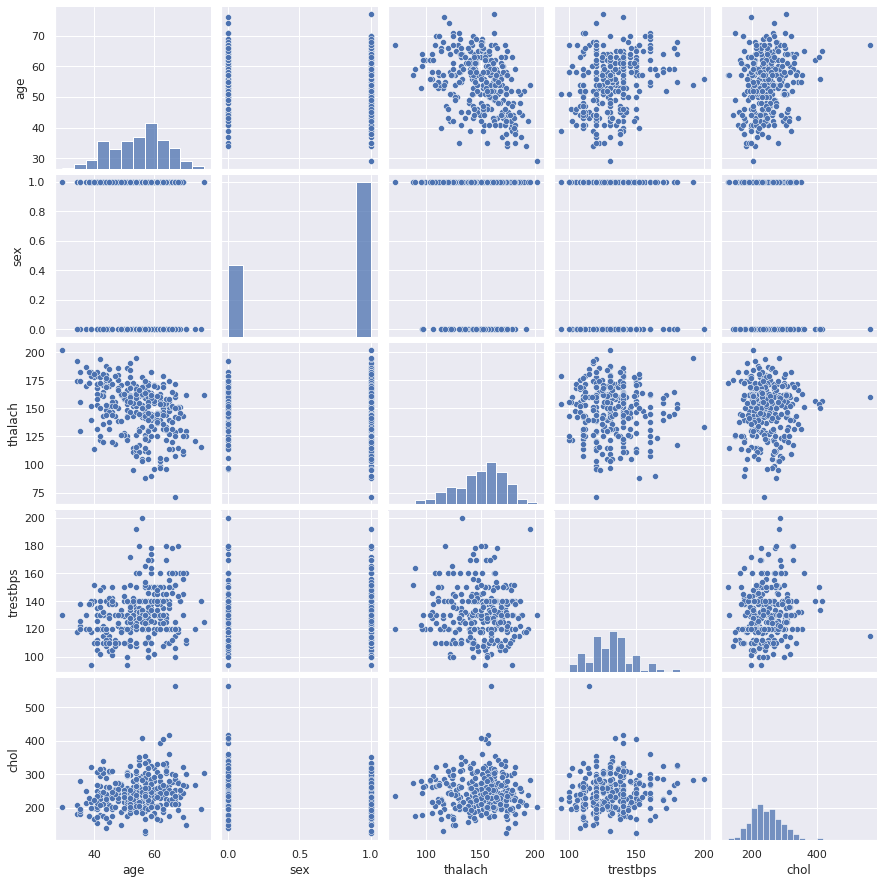

In [36]:
sns.set()
col = ['age','sex','thalach','trestbps','chol']
sns.pairplot(df[col])
plt.show

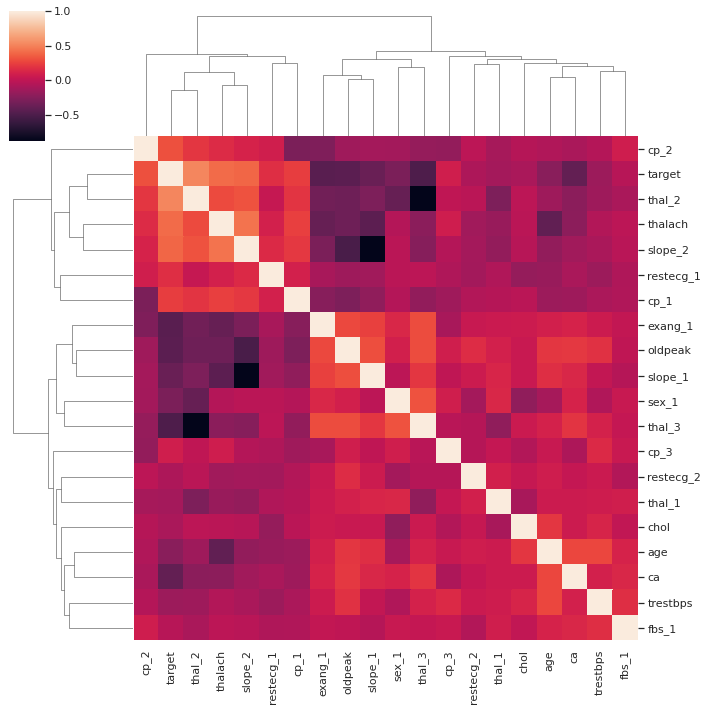

In [71]:
sns.clustermap(dataset.corr())

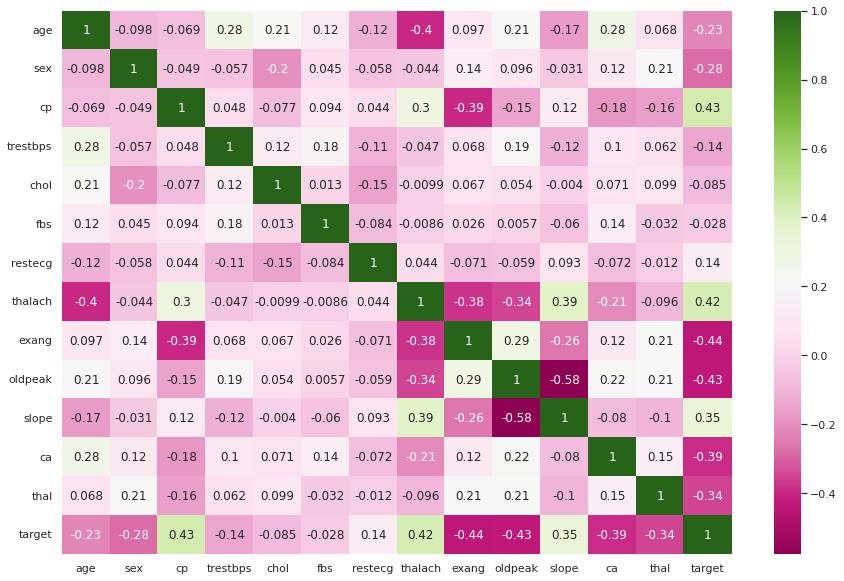

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

In [44]:
sex = pd.get_dummies(df['sex'],prefix='sex',drop_first=True)
fbs = pd.get_dummies(df['fbs'],prefix='fbs',drop_first=True)
restecg = pd.get_dummies(df['restecg'],prefix='restecg',drop_first=True)
exang = pd.get_dummies(df['exang'],prefix='exang',drop_first=True)
cp = pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
slope = pd.get_dummies(df['slope'],prefix='slope',drop_first=True)
thal = pd.get_dummies(df['thal'],prefix='thal',drop_first=True)

df = pd.concat([df,sex,fbs,restecg,exang,cp,slope,thal],axis=1)

KeyError: ignored

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
df = df.drop(columns=['sex','fbs','restecg','exang','cp','slope','thal'])
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,target
0,63,145,233,150,2.3,0,1
1,37,130,250,187,3.5,0,1
2,41,130,204,172,1.4,0,1
3,56,120,236,178,0.8,0,1
4,57,120,354,163,0.6,0,1


In [45]:
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,target
0,63,145,233,150,2.3,0,1
1,37,130,250,187,3.5,0,1
2,41,130,204,172,1.4,0,1
3,56,120,236,178,0.8,0,1
4,57,120,354,163,0.6,0,1


In [46]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,fbs_1,restecg_1,restecg_2,exang_1,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.6,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0


In [47]:
X= dataset.drop('target',axis=1)
y = dataset['target'].values

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) 

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression

In [53]:


lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr_score = lr.score(X_test,y_test)

In [54]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(X_train,y_train)
nv_sc = nv.score(X_test,y_test)

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_regressor = RandomForestClassifier(n_estimators = 1000, random_state = 0)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)
rf_score = rf_regressor.score(X_test,y_test)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
knn_score = knn.score(X_test,y_test)

In [57]:
from sklearn.svm import SVC
sv = SVC(kernel ='rbf',random_state=0)
sv.fit(X_train,y_train)
sv_pred = sv.predict(X_test)
sv_score = sv.score(X_test,y_test)

In [60]:
print("Logistic Regression Model Score is ",round(lr_score*100))
print("SVC Model Score is ",round(sv_score*100))
#print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_score*100))

print("KNeighbors Classifiers Model score is",round(knn_score*100))
print("Naive Bayes model score is",round(nv_sc*100))

Logistic Regression Model Score is  86
SVC Model Score is  83
Random Forest Regression Model Score is  83
KNeighbors Classifiers Model score is 78
Naive Bayes model score is 84


In [61]:
from sklearn.model_selection import cross_val_score
accuracies_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
accuracies_sv = cross_val_score(estimator = sv, X = X_train, y = y_train, cv = 10)
accuracies_rf = cross_val_score(estimator = rf_regressor, X = X_train, y = y_train, cv = 10)
accuracies_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
accuracies_nv = cross_val_score(estimator = nv, X = X_train, y = y_train, cv = 10)

In [62]:
print("Mean Accuracies based on cross val score for logistic regression",round(accuracies_lr.mean()*100))
print("Mean Accuracies based on cross val score for SVM ",round(accuracies_sv.mean()*100))
print("Mean Accuracies based on cross val score for Random Forest",round(accuracies_rf.mean()*100))

print("Mean Accuracies based on cross val score for KNN",round(accuracies_knn.mean()*100))
print("Mean Accuracies based on cross val score for Naive Bayes",round(accuracies_nv.mean()*100))

Mean Accuracies based on cross val score for logistic regression 82
Mean Accuracies based on cross val score for SVM  79
Mean Accuracies based on cross val score for Random Forest 82
Mean Accuracies based on cross val score for KNN 81
Mean Accuracies based on cross val score for Naive Bayes 81


In [63]:
cm_lr = confusion_matrix(y_test,y_pred)
cm_lr

array([[25,  8],
       [ 3, 40]])

In [65]:
cm_sv = confusion_matrix(y_test,sv_pred)
cm_sv

array([[25,  8],
       [ 5, 38]])

In [66]:
cm_rf = confusion_matrix(y_test,rf_pred)
cm_rf

array([[25,  8],
       [ 5, 38]])

In [75]:
print("On default scoring")
print('  Train score  : ', sv.score(X_train, y_train))
print('  Test score   : ', sv.score(X_test, y_test))
print('\n\n')




On default scoring
  Train score  :  0.9030837004405287
  Test score   :  0.8289473684210527



